<a href="https://colab.research.google.com/github/D9151880106d/salary-prediction/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 42378035.8685696
Enter years of experience: 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Salary: ₹59,024.53


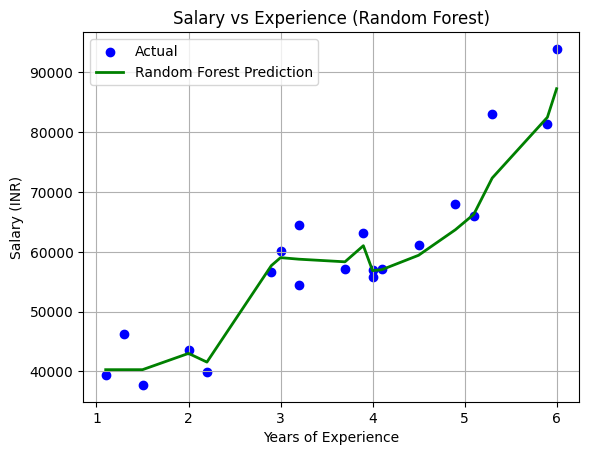

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample dataset: Years of Experience vs Salary
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7,
                        3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189,
               63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940]
}

# Load data into a DataFrame
df = pd.DataFrame(data)

# Split features and target
X = df[['YearsExperience']]
y = df['Salary']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Predict salary for custom experience
years = float(input("Enter years of experience: "))
predicted_salary = model.predict([[years]])
print(f"Predicted Salary: ₹{predicted_salary[0]:,.2f}")

# Plotting
plt.scatter(X, y, color='blue', label='Actual')
# Sort X for smooth line plot
X_sorted = X.sort_values(by='YearsExperience')
plt.plot(X_sorted, model.predict(X_sorted), color='green', linewidth=2, label='Random Forest Prediction')
plt.title('Salary vs Experience (Random Forest)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (INR)')
plt.legend()
plt.grid(True)
plt.show()
